First Steps for Dataset

Download the dataset from kaggle : https://www.kaggle.com/datasets/abhishekinnvonix/seizure-epilepcy-chb-mit-eeg-dataset-pediatric


I selected chb07-07 folder which has 23 edf files for our project.
Details of the dataset i have chosen is:

Data Sampling Rate: 256 Hz
*************************

Channels in EDF Files:
**********************
Channel 1: FP1-F7
Channel 2: F7-T7
Channel 3: T7-P7
Channel 4: P7-O1
Channel 5: FP1-F3
Channel 6: F3-C3
Channel 7: C3-P3
Channel 8: P3-O1
Channel 9: FP2-F4
Channel 10: F4-C4
Channel 11: C4-P4
Channel 12: P4-O2
Channel 13: FP2-F8
Channel 14: F8-T8
Channel 15: T8-P8
Channel 16: P8-O2
Channel 17: FZ-CZ
Channel 18: CZ-PZ
Channel 19: P7-T7
Channel 20: T7-FT9
Channel 21: FT9-FT10
Channel 22: FT10-T8
Channel 23: T8-P8

File Name: chb07_01.edf
File Start Time: 16:58:28
File End Time: 20:58:39
Number of Seizures in File: 0

File Name: chb07_02.edf
File Start Time: 21:00:13
File End Time: 25:00:13
Number of Seizures in File: 0

File Name: chb07_03.edf
File Start Time: 01:00:21
File End Time: 5:00:21
Number of Seizures in File: 0

File Name: chb07_04.edf
File Start Time: 05:00:29
File End Time: 9:00:29
Number of Seizures in File: 0

File Name: chb07_05.edf
File Start Time: 09:00:36
File End Time: 13:00:36
Number of Seizures in File: 0


In [1]:
#importing required libraries for our project

# Please start by installing those two Python packages
#!pip install pyedflib
#!pip install PyWavelets

# And load those libraries
!pip install pyedflib
import pyedflib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import linear_model
import pywt
import matplotlib.patches as patches
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization,LSTM,Dense
from tensorflow.keras.utils import to_categorical
!pip install --upgrade scipy
from scipy import signal

In [2]:
#mount the google drive and upload our required dataset

#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

In [4]:


# Define the path to the main folder containing the sub-folders
main_folder = "/content/drive/My Drive/Brain Dataset/"

# Initialize an empty list to store DataFrames
dfs = []

# Iterate through each sub-folder
sub_folders = os.listdir(main_folder)
for folder in sub_folders:
    folder_path = os.path.join(main_folder, folder)

    # Iterate through each file in the sub-folder
    files = os.listdir(folder_path)
    for file in files:
        if file.endswith(".edf"):
            file_path = os.path.join(folder_path, file)

            # Load the edf file
            f = pyedflib.EdfReader(file_path)
            n = f.signals_in_file
            signal_labels = f.getSignalLabels()
            sigbufs = np.zeros((n, f.getNSamples()[0]))
            for i in np.arange(n):
                sigbufs[i, :] = f.readSignal(i)

            # Create a DataFrame for the signals
            df_signals = pd.DataFrame(sigbufs)
            df_signals = df_signals.transpose()
            df_signals.columns = signal_labels

            # Append the DataFrame to the list
            dfs.append(df_signals)

# Combine all DataFrames in the list
df_combined = pd.concat(dfs, axis=0, ignore_index=True)


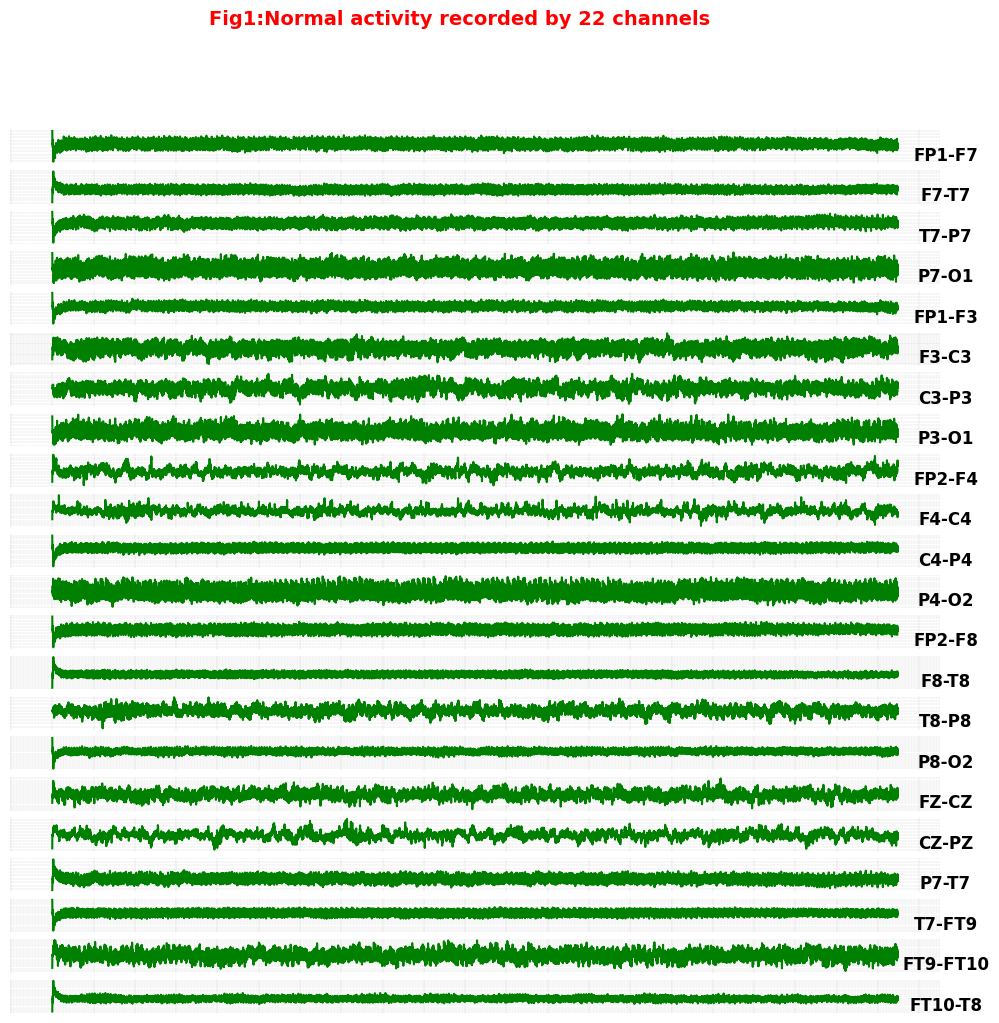

In [5]:
ax = ['ax'+str(i) for i in range(23)]
C = df_combined.columns
plt.figure(figsize=(12,12))
plt.suptitle("Fig1:Normal activity recorded by 22 channels", fontsize= 14,fontweight='bold',color='red')
for i in range(22):
    ax[i] = plt.subplot(23,1,i+1)
    ax[i].plot(df_signals[C[i]].iloc[0:10240],"green")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off' ,length=0)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].set_ylabel(C[i], fontsize=12, rotation=0,fontweight='bold')
    ax[i].yaxis.set_label_position("right")
    ax[i].minorticks_on()
    ax[i].grid(which='both', linewidth=0.2, linestyle='dashed')


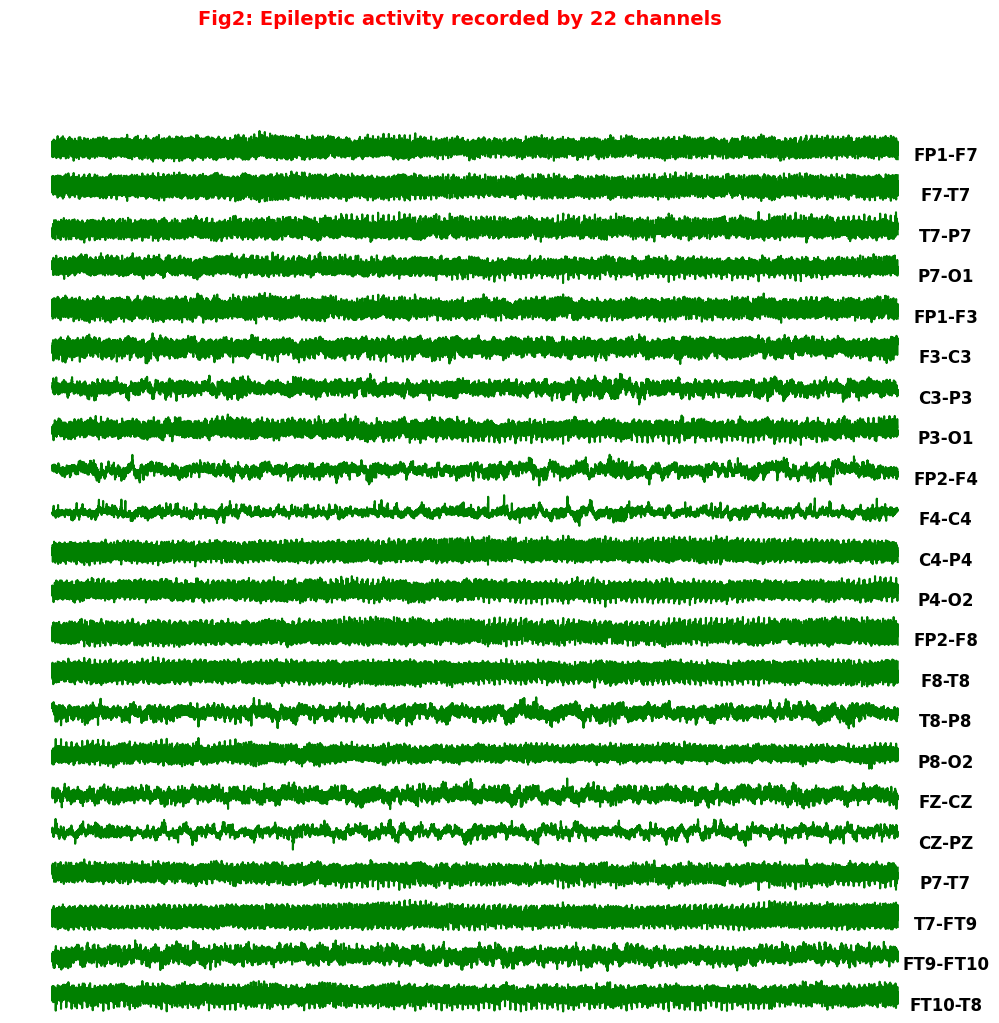

In [6]:
ax = ['ax'+str(i) for i in range(23)]
C = df_combined.columns

plt.figure(figsize=(12,12))
plt.suptitle("Fig2: Epileptic activity recorded by 22 channels", fontsize= 14,fontweight='bold',color='red')
for i in range(22):
    ax[i] = plt.subplot(23,1,i+1)
    ax[i].plot(df_signals[C[i]].iloc[766976:(777216)],"green")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off' ,length=0)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].set_ylabel(C[i], fontsize=12, rotation=0,fontweight='bold')
    ax[i].yaxis.set_label_position("right")

Data Preprocessing:


Preprocess eeg signals using apply notch filtering and Unscented Kalman Filter

In [10]:
!pip install mne
import mne

Creating RawArray with float64 data, n_channels=23, n_times=3686400
    Range : 0 ... 3686399 =      0.000 ... 14399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   12.9s


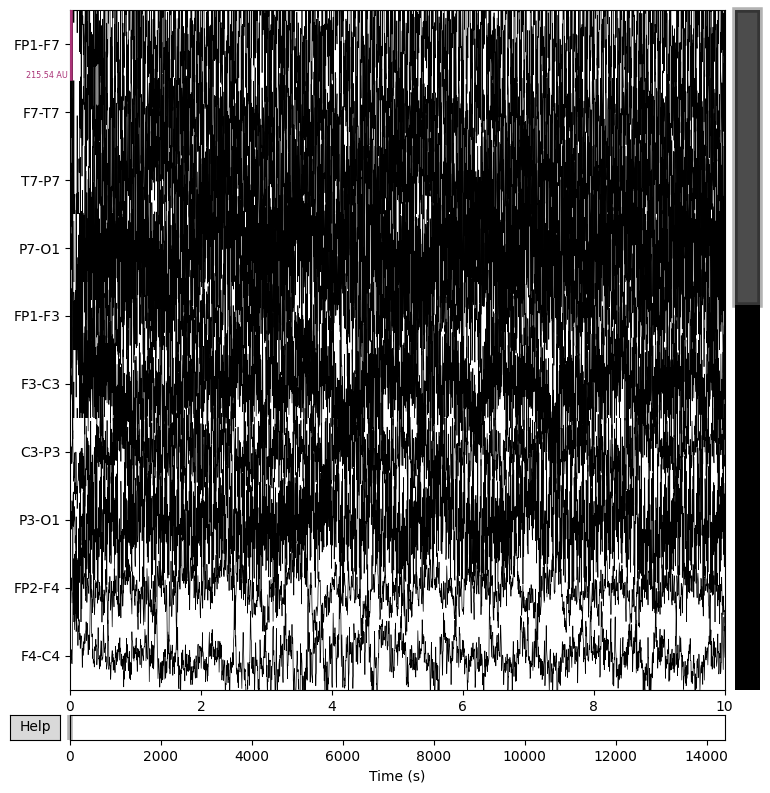

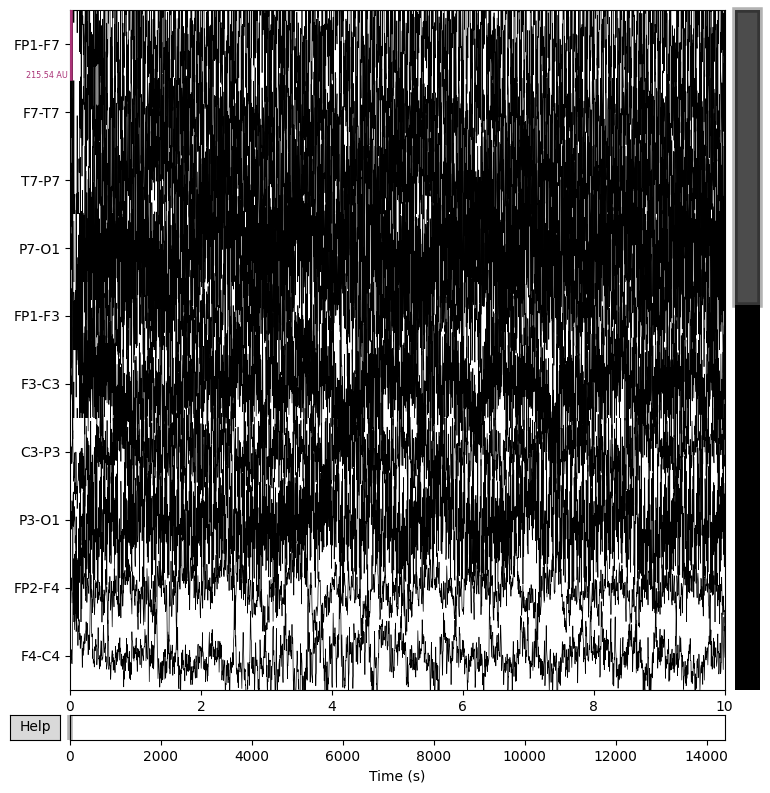

In [17]:


# Define the sampling frequency (in Hz) of your EEG data
sfreq = 256  # Example, replace with your actual sampling frequency




# Define channel indices
channel_indices = np.arange(n)  # Assuming sequential indices from 0 to n-1

    # Create an info structure for the data
info = mne.create_info(ch_names=signal_labels, sfreq=sfreq)

    # Create a raw MNE object from the data
raw = mne.io.RawArray(sigbufs, info)

    # Apply Notch filtering to remove power line interference
freqs = np.arange(60, 126, 60)
picks = channel_indices  # Use all channels
raw.notch_filter(freqs=freqs, picks=picks)



# Apply Unscented Kalman Filter to address baseline drift
raw.plot(duration=10, n_channels=10)  # Visualize data before filtering



In [18]:
!pip install pykalman


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48443 sha256=9ffcb06a0cd2bd714828427064a17c3e362c0884de372be8ab6b3f06ec2f84f8
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


In [ ]:
import pykalman

def apply_ukf_chunked(data, chunk_size=23):
    n_channels, n_samples = data.shape
    ukf = pykalman.UnscentedKalmanFilter(initial_state_mean=np.zeros(n_channels),
                                         n_dim_obs=n_channels)

    filtered_data = np.zeros((n_channels, n_samples))

    for i in range(0, n_samples, chunk_size):
        start_idx = i
        end_idx = min(i + chunk_size, n_samples)
        chunk = data[:, start_idx:end_idx]

        (filtered_state_means, _) = ukf.filter(chunk)
        filtered_data[:, start_idx:end_idx] = filtered_state_means.T

    return filtered_data

# Define the chunk size based on your available memory
chunk_size = 23 # Adjust this value based on your system's capabilities

# Apply Unscented Kalman Filter in chunks
filtered_data = apply_ukf_chunked(raw.get_data(), chunk_size=chunk_size)

# Create an info structure for the filtered data
info_filtered = mne.create_info(ch_names=signal_labels, sfreq=sfreq)

# Create a raw MNE object from the filtered data
raw_filtered = mne.io.RawArray(filtered_data, info_filtered)

# Apply Notch filtering to remove power line interference (if necessary)
freqs = np.arange(60, 126, 60)
picks = channel_indices  # Use all channels
raw_filtered.notch_filter(freqs=freqs, picks=picks)

# Visualize data after filtering
raw_filtered.plot(duration=10, n_channels=10)
